https://www.justintodata.com/data-cleaning-techniques-python-guide/
In reality, the raw data is almost always messy. If you use such data for analysis, for example, feed into a machine learning model, you’ll get useless insights most of the time. That’s why data cleansing is a critical process for data analysts and data scientists.

In [1]:
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

df = pd.read_csv("../data/north1.csv")
df = df[:100000]

In [2]:
#add nan value
for col in df.columns:
    df.loc[df.sample(frac=0.1).index, col] = pd.np.nan

C:\Users\sasch\AppData\Local\Temp\ipykernel_3040\419523429.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.loc[df.sample(frac=0.1).index, col] = pd.np.nan


# Get information on the dataset

Getting the type and number of non-null values from the entire dataset

In [3]:
df.info(verbose=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Unnamed: 0                                             90000 non-null  float64
 1   index                                                  90000 non-null  float64
 2   Data                                                   90000 non-null  object 
 3   Hora                                                   90000 non-null  object 
 4   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       90000 non-null  float64
 5   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  90000 non-null  float64
 6   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        90000 non-null  float64
 7   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       90000 non-null  float64
 8   RADIACAO GLOBAL (Kj/m²)                      

,Unnamed: 0,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0.0,0.0,2000-05-09,00:00,-9999.0,-9999.0,-9999.0,-9999.0,NaN,NaN,...,-9999.0,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1.0,1.0,NaN,NaN,-9999.0,-9999.0,-9999.0,-9999.0,NaN,-9999.0,...,NaN,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2.0,2.0,2000-05-09,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,NaN,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3.0,3.0,2000-05-09,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4.0,4.0,2000-05-09,NaN,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,NaN,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


Getting 2 lists that contains the name of the columns depending on the type of data
- numerical
- non numerical

In [4]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Unnamed: 0', 'index', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)', 'latitude', 'longitude', 'height'],
      dtype='object')
Index(['Data', 'Hora', 'region', 'state', 'station', 'station_code']

# Missing Data

## Method #1: missing data (by columns) count & percentage

Missing data or missing values are when there’s no data value stored for a column in a row. It is very common among real-world datasets. If not handled properly, they would significantly impact the results of data analysis. Many machine learning models can’t tolerate any missing values. So, we must learn how to handle missing data.

In [5]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Data          90000 non-null  object
 1   Hora          90000 non-null  object
 2   region        90000 non-null  object
 3   state         90000 non-null  object
 4   station       90000 non-null  object
 5   station_code  90000 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


We can print out the first 10 columns to look at.

In [6]:
num_missing = df.isna().sum()
num_missing[:10]

Unnamed: 0                                               10000
index                                                    10000
Data                                                     10000
Hora                                                     10000
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         10000
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    10000
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          10000
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         10000
RADIACAO GLOBAL (Kj/m²)                                  10000
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             10000
dtype: int64

Besides the count of missing values, we can use the below code to calculate the percentages of missing values by columns

In [7]:
pct_missing = df.isna().mean()
pct_missing[:10]

Unnamed: 0                                               0.1
index                                                    0.1
Data                                                     0.1
Hora                                                     0.1
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         0.1
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    0.1
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          0.1
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         0.1
RADIACAO GLOBAL (Kj/m²)                                  0.1
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             0.1
dtype: float64

## Method #2: missing data (by columns) heatmap

<AxesSubplot:>

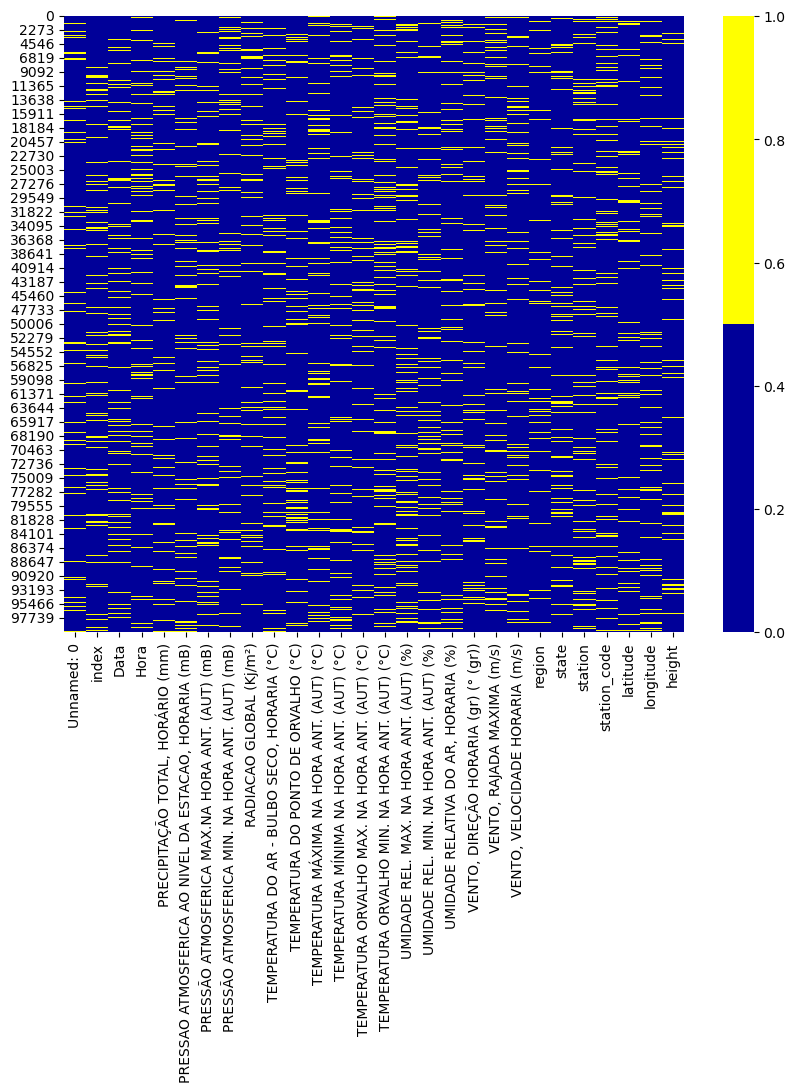

In [8]:
plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

The missingno library is a small toolset focused on missing data visualizations and utilities. So you can get the same missing data heatmap as above with shorter code.

<AxesSubplot:>

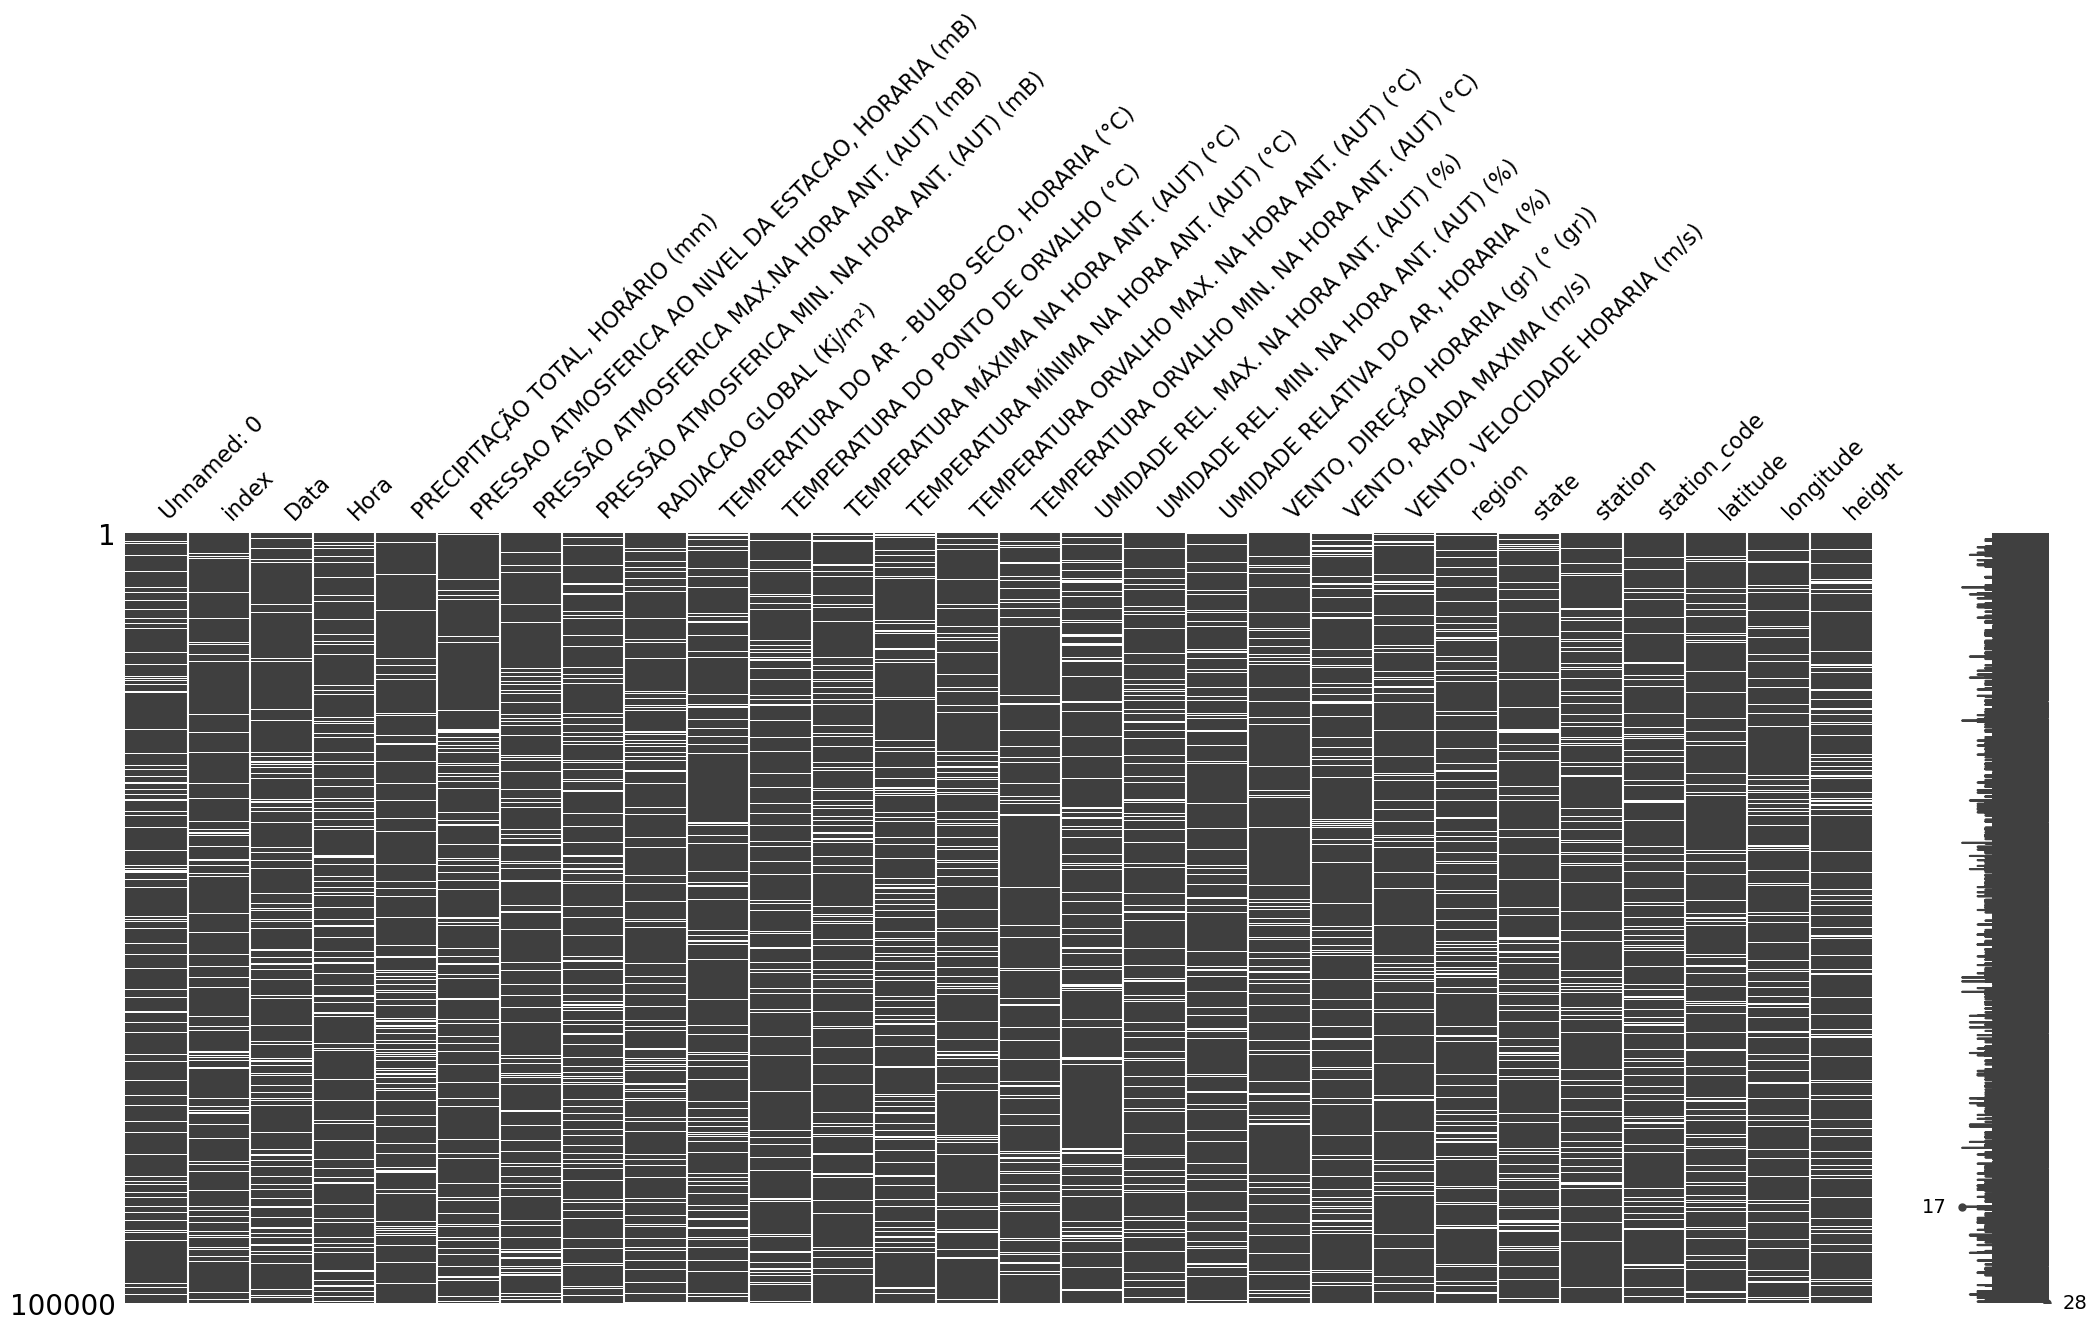

In [9]:
msno.matrix(df.iloc[:, :30])

## Method #3: missing data (by rows) histogram

<AxesSubplot:>

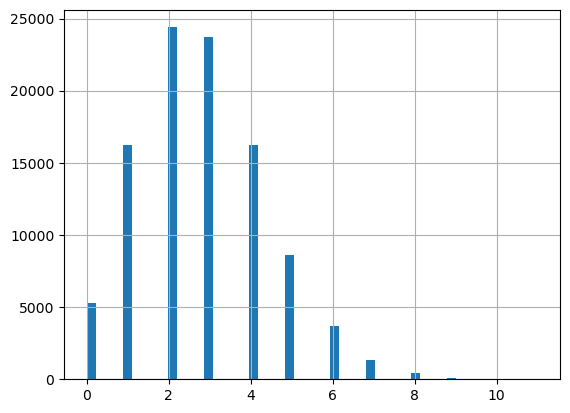

In [10]:
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

## what to do with missing data ?
There are NO agreed-upon solutions to dealing with missing data. We have to study the dataset and its specific columns to determine how to clean their missing values.

### Technique #1: drop columns / features
This technique is straightforward. We drop the entire column or feature with missing data, which will certainly cause a loss of information. So we should only perform this when we are sure that the missing data is not informative. Otherwise, we should consider other solutions.

In [11]:
pct_missing[pct_missing > .3]

Series([], dtype: float64)

In [12]:
df_less_missing_cols = df.loc[:, pct_missing <= .3].copy() # equivalent to df.drop(columns=pct_missing[pct_missing > .3].index)
df_less_missing_cols.shape

(100000, 28)

### Technique #2: drop rows / observations
We can drop the entire row with missing data like the first technique. Again, please be aware of the loss of information when removing rows.

If we only want to drop the rows with many missing values, we can do it similarly to the previous technique.

In [13]:
df_less_missing_rows = df[missing_by_row < 35].copy()
df_less_missing_rows.shape # equivalent to df.dropna(axis='index', thresh=292-35+1).shape

(100000, 28)

### Technique #3: impute the missing with constant values
Instead of dropping data, we can also replace the missing. An easy method is to impute the missing with constant values.

In [14]:
df_copy = df.copy()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(-999)
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna('_MISSING_')

### Technique #4: impute the missing with statistics
Besides constants, we can also impute the missing values with statistics.

In [15]:
df_copy = df.copy()
med = df_copy[numeric_cols].median()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(med)

In [16]:
most_freq = df_copy[non_numeric_cols].describe().loc['top']
most_freq

Data            2004-12-22
Hora                 15:00
region                   N
state                   AM
station             MANAUS
station_code          A101
Name: top, dtype: object

In [17]:
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna(most_freq)

# Irregular data (outliers)
Outliers are data that is distinct from other observations. They could bias our data analysis results, providing a misleading representation of the data. Outliers could be real outliers or mistakes.

## How to find out?

### Method 
First, let’s look at kurtosis. Kurtosis is a statistical measure of ‘tailedness’. The higher kurtosis is often linked to the greater extremity of deviations (or outliers) in the data. So this is a single statistic to detect potential outliers.

In [18]:
df.kurt(numeric_only=True)[:10]

Unnamed: 0                                              -1.198571
index                                                   -1.125520
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                        -0.977503
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   -0.966842
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)         -1.035703
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)        -1.042923
RADIACAO GLOBAL (Kj/m²)                                  3.339588
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)            -0.972181
TEMPERATURA DO PONTO DE ORVALHO (°C)                    -0.987957
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)              -1.038230
dtype: float64

In [20]:
df['RADIACAO GLOBAL (Kj/m²)'].describe()

count    90000.000000
mean     -3213.658422
std      10306.424934
min      -9999.000000
25%      -9999.000000
50%      -9999.000000
75%       1344.250000
max      45049.000000
Name: RADIACAO GLOBAL (Kj/m²), dtype: float64

### Method #2: histogram & box plot
Let’s use the data visualization method to detect outliers. We’ll plot a histogram and a box plot of the column life_sq

<AxesSubplot:>

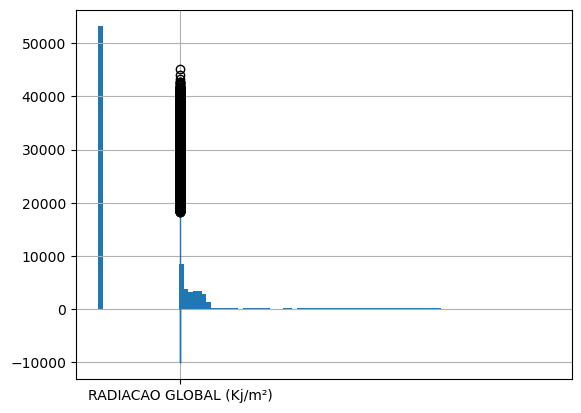

In [22]:
df['RADIACAO GLOBAL (Kj/m²)'].hist(bins=100)
df.boxplot(column=['RADIACAO GLOBAL (Kj/m²)'])

### Method #3: bar chart
As mentioned, outliers are mainly defined for numeric data. But for non-numeric data, there could be irregular values too. We can use a bar chart to learn about the categories and their distributions.

<AxesSubplot:>

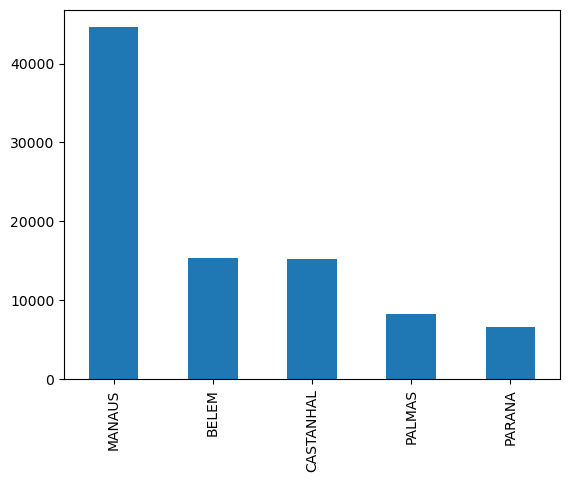

In [24]:
df['station'].value_counts().plot(kind='bar')

## What to do?
While outliers are not hard to see, it is tricky to clean them. It depends on the dataset and the goal of the project.

The methods of handling outliers are somewhat similar to missing data. We could drop, replace, or even just keep them.


# Unnecessary data
All the data included in the analysis should support the project’s goal. We consider the data to be unnecessary when it doesn’t add value. We’ll cover 3 main types of unnecessary data.

## Unnecessary type #1: repetitive & uninformative
One column can have many observations being the same value. When an extremely high percentage of the column has a repetitive value, we should investigate whether such a column provides valuable information.

### How to find out?
We can generate a list of columns with a high percentage of the same value. For example, we specify below to show columns with over 99.9% rows being the same value.

In [25]:
num_rows = len(df)

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

## Unnecessary type #2: irrelevant
Again, the data needs to provide valuable information for the project. If the features are not related to the question we are trying to solve, they are irrelevant.

### How to find out?
We need to skim through the features to identify irrelevant ones. For example, a feature recording the temperature in the US wouldn’t provide direct insights into housing prices in Russia.

### What to do?

When the features are not serving the project’s goal, we can remove them. You could use the drop method in pandas.

## Unnecessary type #3: duplicates
The duplicate data is when copies of the same observation exist. Let’s look at 2 main types of duplicate data and clean them in Python.

### Duplicates type #1: all columns based
#### How to find out?

This is easy to understand. Such duplicate occurs when all the columns’ values within the observations are the same.

We can use the duplicated method to grab the boolean values of whether a row is duplicated, and then use it to filter for duplicated rows from df.

In [26]:
df[df.duplicated()]

,Unnamed: 0,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height


#### What to do?

If there were any duplicates, we could remove them. We can use the drop_duplicates method. But this will return the same DataFrame since there weren’t any duplicates.

In [27]:
df.drop_duplicates()

,Unnamed: 0,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0.0,0.0,2000-05-09,00:00,-9999.0,-9999.0,-9999.0,-9999.0,NaN,NaN,...,-9999.0,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1.0,1.0,NaN,NaN,-9999.0,-9999.0,-9999.0,-9999.0,NaN,-9999.0,...,NaN,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2.0,2.0,2000-05-09,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,NaN,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3.0,3.0,2000-05-09,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4.0,4.0,2000-05-09,NaN,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,NaN,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995.0,24803.0,2005-01-01,11:00,0.0,NaN,1006.4,NaN,7295.0,25.2,...,100.0,2.4,1.2,NaN,PA,CASTANHAL,A202,-1.300833,-47.930833,65.00
99996,99996.0,24804.0,2005-01-01,12:00,0.0,NaN,1007.0,1006.4,18078.0,28.1,...,62.0,6.6,4.2,N,PA,NaN,A202,-1.300833,-47.930833,65.00
99997,99997.0,24805.0,2005-01-01,13:00,0.0,1006.9,1007.1,1006.9,24750.0,29.3,...,45.0,8.2,4.4,N,PA,NaN,A202,-1.300833,-47.930833,65.00
99998,99998.0,NaN,2005-01-01,NaN,0.0,1006.4,1006.9,1006.4,33226.0,31.1,...,58.0,7.8,4.5,N,NaN,CASTANHAL,A202,-1.300833,-47.930833,65.00


### Duplicates type #2: key columns based
Instead of looking at all columns, sometimes we want to detect duplicates based on a set of identifiers (columns).
#### How to find out?

For example, we know that the column index is probably unique. What if we drop it and see if there are duplicates based on the rest of the columns?

In [30]:
df[df.drop(columns=['index']).duplicated()]

,Unnamed: 0,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
66368,NaN,17888.0,NaN,08:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
74350,NaN,25870.0,NaN,22:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
94496,NaN,19304.0,NaN,08:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,N,AM,MANAUS,A101,NaN,-60.016389,61.25
95087,NaN,19895.0,NaN,23:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


#### What to do?
We could remove them and save the new dataset as df_dedupped. We can also compare the shapes of the two datasets (df and df_dedupped).

In [32]:
df_dedupped = df.drop(columns=['index']).drop_duplicates()

print(df.shape)
print(df_dedupped.shape)

(100000, 28)
(99996, 27)


### Other example
#### How to find out?

For house sales, let’s assume that if two transactions have the same timestamp, full_sq, life_sq, floor, build_year, num_room, price_doc, they are duplicates. Let’s look at duplicates based on this set of columns. We can use the below code to show the duplicated rows based on those columns.

In [36]:
key = ['Data', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'VENTO, VELOCIDADE HORARIA (m/s)', 'station' , 'height']
df_grouped = df.fillna(-999).groupby(key)['index'].count()
df_grouped[df_grouped > 1]

Data        PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  VENTO, VELOCIDADE HORARIA (m/s)  station  height 
-999        -9999.0                           -9999.0                          -999     -999.00     23
                                                                                         24.00      40
                                                                                         61.25     148
                                                                                         65.00       7
                                                                                         280.00      7
                                                                                                  ... 
2005-12-30   0.0                               2.8                             MANAUS    61.25       2
2005-12-31   0.0                               0.4                             -999      61.25       2
                                               0.6                             M

#### What to do?

We can drop these duplicates based on the subset of key columns.

In [37]:
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(100000, 28)
(63194, 28)


# Inconsistent data
It is crucial to have the dataset follow specific standards. There could be different inconsistent data that needs to be cleaned and we’ll cover 4 common ones. Please note that the actual data may be even messier, be creative when cleaning it!

## Inconsistent type #1: capitalization

Inconsistent use of upper and lower cases in categorical values is typical. We need to clean it since Python is case-sensitive.

### How to find out?

In [40]:
df['station'].value_counts(dropna=False)

MANAUS       44598
BELEM        15364
CASTANHAL    15254
NaN          10000
PALMAS        8210
PARANA        6574
Name: station, dtype: int64

We are lucky that the text in this column looks standardized. But there could be inconsistent capitalizations. For instance, ‘PALMAS ’ and ‘PARANA’ could refer to the same station

### What to do?
to avoid this, we can lowercase (or uppercase) all letters.

In [41]:
df['station_lower'] = df['station'].str.lower()
df['station_lower'].value_counts(dropna=False)

manaus       44598
belem        15364
castanhal    15254
NaN          10000
palmas        8210
parana        6574
Name: station_lower, dtype: int64

## Inconsistent type #2: data types

Another standardization we often need to look at is the data types.

### How to find out?

If you recall, earlier, we’ve used the info method to print out the summary of the DataFrame. We could see the data types of each column. We could also print out one column to take a look. Let’s try timestamp.

In [43]:
df['Data']

0        2000-05-09
1               NaN
2        2000-05-09
3        2000-05-09
4        2000-05-09
            ...    
99995    2005-01-01
99996    2005-01-01
99997    2005-01-01
99998    2005-01-01
99999    2005-01-01
Name: Data, Length: 100000, dtype: object

### What to do?

We can convert the column to a DateTime format and even extract the specific year, month, weekday, etc.

In [44]:
df['Data_dt'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')
df['year'] = df['Data_dt'].dt.year
df['month'] = df['Data_dt'].dt.month
df['weekday'] = df['Data_dt'].dt.weekday

df[['Data_dt', 'year', 'month', 'weekday']].head()

,Data_dt,year,month,weekday
0,2000-05-09,2000.0,5.0,1.0
1,NaT,NaN,NaN,NaN
2,2000-05-09,2000.0,5.0,1.0
3,2000-05-09,2000.0,5.0,1.0
4,2000-05-09,2000.0,5.0,1.0


## Inconsistent type #3: typos of categorical values
A categorical column takes on a limited and usually fixed number of possible values. Sometimes it shows other values due to reasons like typos.

### How to find out?
    We generate a new DataFrame, df_city_ex
    There is only one column that stores the city names. There are misspellings. For example, ‘torontoo’ and ‘tronto’ both refer to the city of ‘toronto’.
    The variable cities stores the 4 correct names of ‘toronto’, ‘vancouver’, ‘montreal’, and ‘calgary’.
    To identify typos, we use fuzzy logic matches. We use edit_distance from nltk, which measures the number of operations (e.g., substitution, insertion, deletion) needed to change from one string into another string.
    We calculate the distance between the actual values and the correct values.

In [46]:
df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})

cities = ['toronto', 'vancouver', 'montreal', 'calgary']
from nltk.metrics import edit_distance
for city in cities:
    df_city_ex[f'city_distance_{city}'] = df_city_ex['city'].map(lambda x: edit_distance(x, city))

df_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,torontoo,1,8,7,8
1,toronto,0,8,7,7
2,tronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancover,7,1,7,7
5,vancouvr,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


### What to do?

We can set criteria to convert these typos to the correct values. For example, the below code sets all the values within 2 characters distance from ‘toronto’/’vancouver’ to be ‘toronto’/’vancouver’.

In [47]:
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,toronto,1,8,7,8
1,toronto,0,8,7,7
2,toronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancouver,7,1,7,7
5,vancouver,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


## Inconsistent type #4: addresses
This is the last data cleaning in Python problem we’ll cover. If you’ve worked with addresses, you know how messy they can be. Just imagine how people can write addresses in all different ways!


### How to find out?

We can find messy address data by looking at it. Even though sometimes we can’t spot any problems, we can still run code to standardize them in case there are hidden issues.

There is no address column in our housing dataset due to privacy. Let’s create a new dataset df_add_ex with a column address.

In [48]:
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


### What to do?

We can run the below code to:

    lowercase the letters
    remove leading and trailing white spaces
    delete periods
    standardize wordings

In [49]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespaces.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '', regex=True) # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st', regex=True) # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt', regex=True) # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave', regex=True) # replace av with ave.

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave
